# NFL Combine Classification Modeling

## Technical Notebook

## Project Goals

- Determine the influence the NFL Combine has on a lineman (offensive linemen and defensive linemen) prospect's draft status (getting drafted or not).
- Reveal how much the NFL Combine factors in on a lineman (offensive linemen and defensive linemen) prospect's draft value (how early or how late a prospect gets drafted, if at all).
- Discover which NFL Combine drills have the most impact on a lineman (offensive linemen and defensive linemen) prospect's draft position.

## Summary of Data

The dataset that was analyzed for this study contains 9,544 observations of NFL Combine and NFL Draft data, dating from 1987-2017. The NFL Combine data primarily displays the performance of players over that time period in combine drills. The NFL Draft data contains the draft pick information of players from that time span, including what round they were selected in and the team that picked them.

### Library Import

In [1]:
#Import libraries
%run ../python_files/libraries
%matplotlib inline
# from libraries import *   #for use within .py file

/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  dep

### Data Import

In [2]:
#Import cleaned data from our exploratory data analysis
%run ../python_files/nfl_combine_eda

## Modeling

##### Pre-Modeling Techniques

- Scaling: We use Standard Scaler to scale our 'x' training and test datasets so that our model does not unfairly penalize our coefficients due to differences in units.

- Resampling: We use SMOTE for resampling, as this method creates synthetic samples for minority classes. This will oversample the minority classes and thus, add more balance to our model.

##### Model Implementation and Model Performance

We utilized a pipeline technique to implement 8 different model types:

- Logistic Regression
- KNN
- SVC
- NuSVC
- Decision Tree
- Random Forest
- Ada Boost
- Gradient Boosting

After running our pipeline, we will be able to review model performance using accuracy as our primary metric, as well as confusion matrices to review correct predictions vs incorrect predictions.

In [3]:
# draft_status Training Model Selection and Comparison

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(),
    NuSVC(probability=True),
    DecisionTreeClassifier(max_depth = 8),
    RandomForestClassifier(max_depth = 8),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_ds, y_train_ds)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_train_ds, pipe.predict(x_train_ds)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Precision Score: ",conf_matrix.iloc[1,1]/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]))
    print("model score: %.3f" % pipe.score(x_train_ds, y_train_ds), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,242,571
actual 1,143,1522


Precision Score:  0.7271858576206403
model score: 0.712 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,492,321
actual 1,133,1532


Precision Score:  0.8267674042093902
model score: 0.817 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,242,571
actual 1,70,1595


Precision Score:  0.7363804247460757
model score: 0.741 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,501,312
actual 1,73,1592


Precision Score:  0.8361344537815126
model score: 0.845 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,461,352
actual 1,135,1530


Precision Score:  0.8129649309245484
model score: 0.803 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,363,450
actual 1,11,1654


Precision Score:  0.7861216730038023
model score: 0.814 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,271,542
actual 1,151,1514


Precision Score:  0.7363813229571985
model score: 0.720 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,339,474
actual 1,78,1587


Precision Score:  0.7700145560407569
model score: 0.777 



In [4]:
# draft_status Test Model Selection and Comparison

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_ds, y_train_ds)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_ds, pipe.predict(x_test_ds)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Precision Score: ",conf_matrix.iloc[1,1]/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]))
    print("model score: %.3f" % pipe.score(x_test_ds, y_test_ds), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,53,151
actual 1,28,388


Precision Score:  0.7198515769944341
model score: 0.711 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,75,129
actual 1,76,340


Precision Score:  0.7249466950959488
model score: 0.669 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,41,163
actual 1,24,392


Precision Score:  0.7063063063063063
model score: 0.698 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,80,124
actual 1,65,351


Precision Score:  0.7389473684210527
model score: 0.695 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,68,136
actual 1,74,342


Precision Score:  0.7154811715481172
model score: 0.661 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,34,170
actual 1,20,396


Precision Score:  0.6996466431095406
model score: 0.694 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,65,139
actual 1,44,372


Precision Score:  0.7279843444227005
model score: 0.705 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,49,155
actual 1,41,375


Precision Score:  0.7075471698113207
model score: 0.684 



## Logistic Regression Model: Further Analysis

### Further analysis of this model will help determine which combine drills are most important for linemen (offensive and defensive linemen)

##### Model Implementation



In [5]:
logit_model = sm.Logit(y_train_ds, x_train_ds)
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.568057
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           draft_status   No. Observations:                 2478
Model:                          Logit   Df Residuals:                     2460
Method:                           MLE   Df Model:                           17
Date:                Tue, 04 Feb 2020   Pseudo R-squ.:                  0.1023
Time:                        22:39:46   Log-Likelihood:                -1407.6
converged:                       True   LL-Null:                       -1568.1
Covariance Type:            nonrobust   LLR p-value:                 5.264e-58
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
height_inches                   0.1117      0.027      4.084      0.000   

##### Model Fitting

We use our model from above, which was built on the training data set, to test against our test data set below. This will help us evaluate the model performance of our logistic regression model.

In [6]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train_ds, y_train_ds)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predicting Test Set Results and Calculating Accuracy

Below, we use several metrics to evaluate the model performance of our logistic regression model, including the calculation of accuracy, a confusion matrix, a classification report, and a plot of a ROC curve. These performance evaluation techniques evaluate the training dataset against the test data set.

In [7]:
y_pred_ds = logreg_model.predict(x_test_ds)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_model.score(x_test_ds, y_test_ds)))


Accuracy of logistic regression classifier on test set: 0.71


Through the calculation of the accuracy, 71% of the variability in 'draft_status' can be explained using our feature variables, which is promising.

##### Confusion Matrix

The below confusion matrix results are telling us that we have 441 correct predictions (395 true positives + 46 true negatives = 441 correct predictions) and 263 incorrect predictions (158 false positives + 21 false negatives = 179). The ratio of approximately 2.5 correct predictions to every 1 incorrect prediction is a good sign.

In [8]:
confusion_matrix = confusion_matrix(y_test_ds, y_pred_ds)
print(confusion_matrix)

[[ 46 158]
 [ 21 395]]


##### ROC Curve

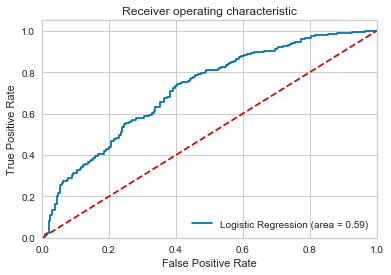

In [9]:
# ROC Curve

logit_roc_auc = roc_auc_score(y_test_ds, logreg_model.predict(x_test_ds))
fpr, tpr, thresholds = roc_curve(y_test_ds, logreg_model.predict_proba(x_test_ds)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## NuSVC Model: Further Analysis

### Further analysis of this model will help determine which combine drills are most important for linemen (offensive and defensive linemen)

## Results and Conclusions

